In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install numpy pandas opencv-python face-recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=ad7f0c8d18f25bfc2295e1fa7bfd160ade23020d641fc6fb111d8429b224d04e
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import cv2
import face_recognition
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!ls /content/gdrive/MyDrive/Colab\ Notebooks/4_colab

001_00.png  002_00.png


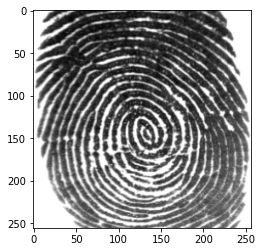

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/4_colab/002_00.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

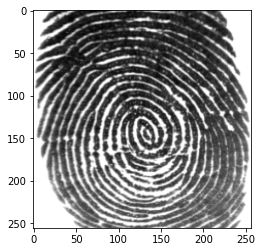

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

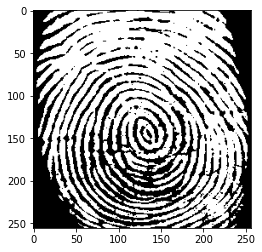

In [ ]:
img_zero = np.zeros((256, 256), dtype=np.uint8) # char
img_zero[img_gray > 127] = 255
img_src = 255 - img_zero
plt.imshow(img_src, cmap='gray')

In [ ]:
ret,img = cv2.threshold(img_src, 127, 255, 0)

In [ ]:
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

In [ ]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

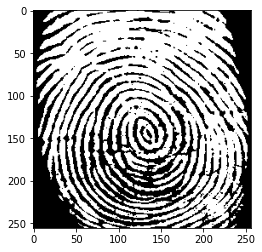

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
while True:
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    temp = cv2.subtract(img, open)
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    if cv2.countNonZero(img)==0:
      break

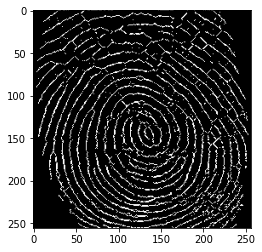

In [ ]:
plt.imshow(skel, cmap='gray')